<a href="https://colab.research.google.com/github/hunterpozzebon/Team20_Datathon2_CHL5230/blob/main/Team20_Datatthon2_Mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/hunterpozzebon/Team20_Datathon2_CHL5230/main/Mortality%20Dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Cleaning

In [5]:
# Checking for missing values
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


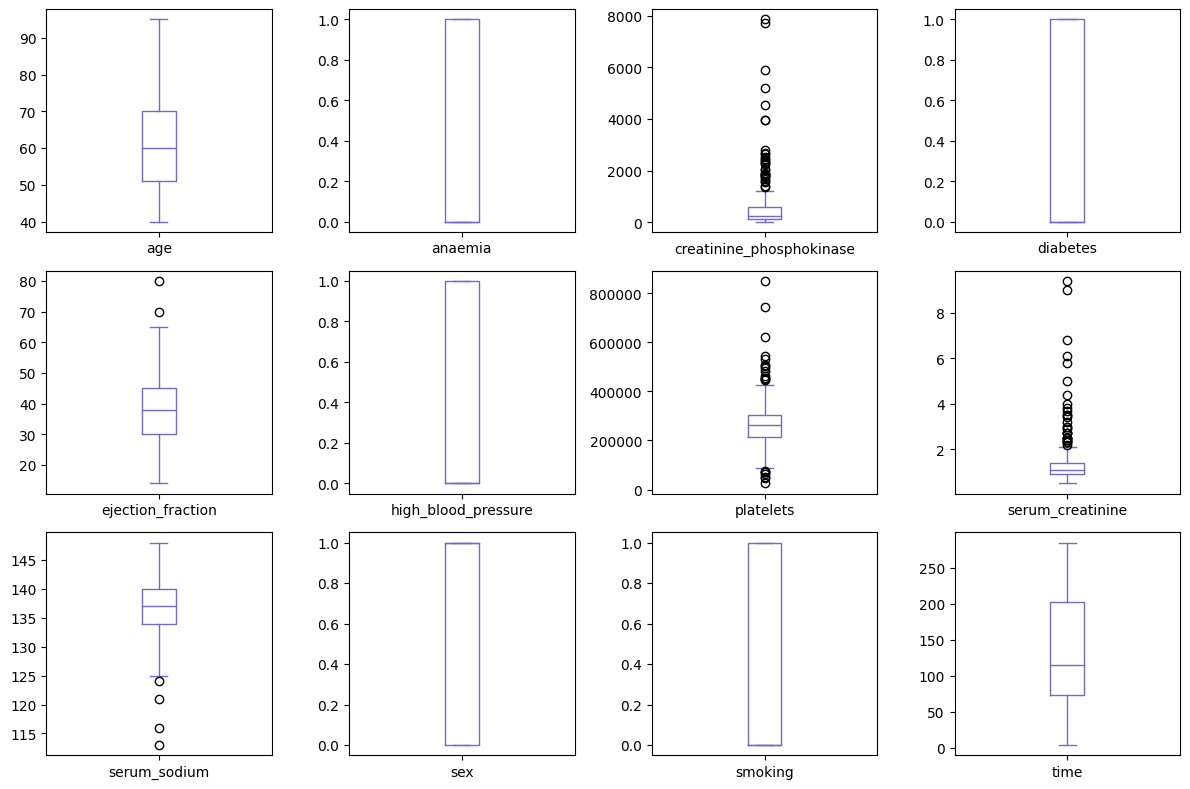

In [6]:
# Check for outliers
box_data = df.drop('DEATH_EVENT', axis=1, inplace = False)
box_data.plot(kind='box', subplots=True, layout=(3, 4), figsize=(12, 8), color='#7569c9')
plt.tight_layout()
plt.show()

# Expoloratory Data

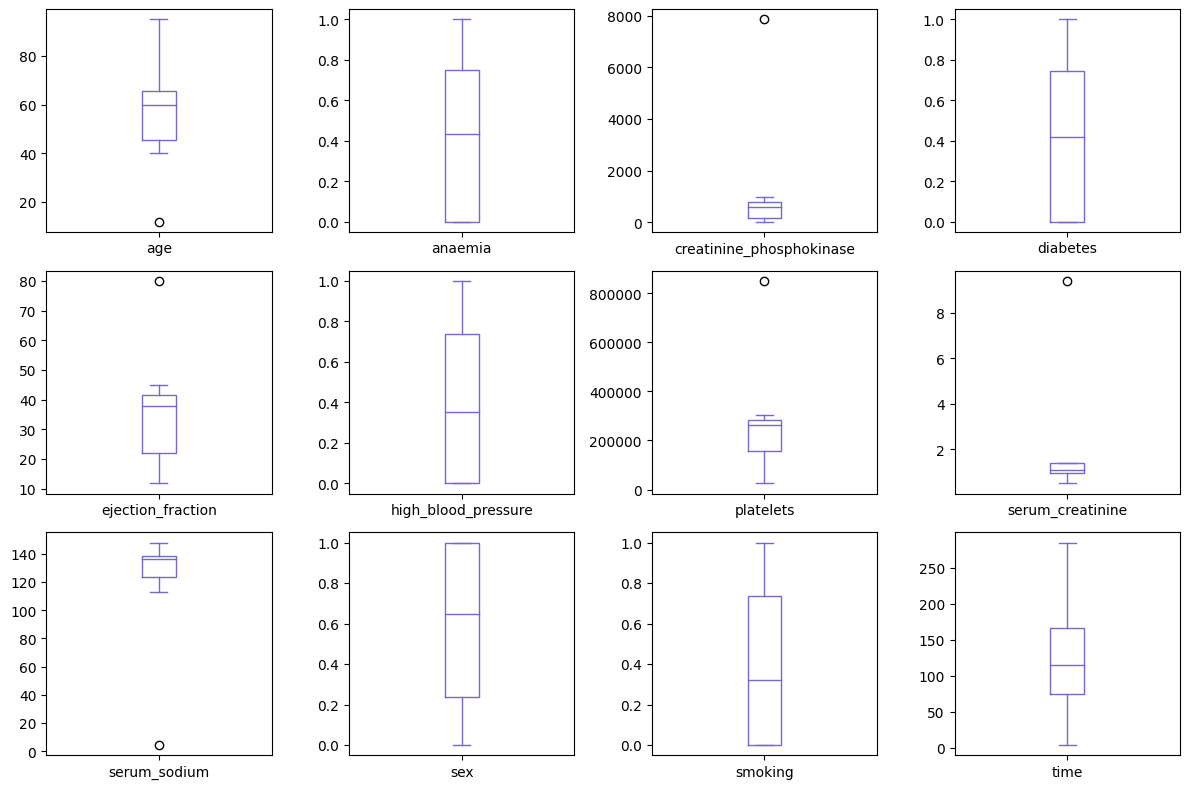

In [7]:
# Summary Statistics
description = df.describe()
description

# Visualize summary statistics
description = description.drop('count')
description = description.drop('DEATH_EVENT', axis=1)

description.plot(kind='box', subplots=True, layout=(3, 4), figsize=(12, 8), color='#7569c9')
plt.tight_layout()
plt.show()

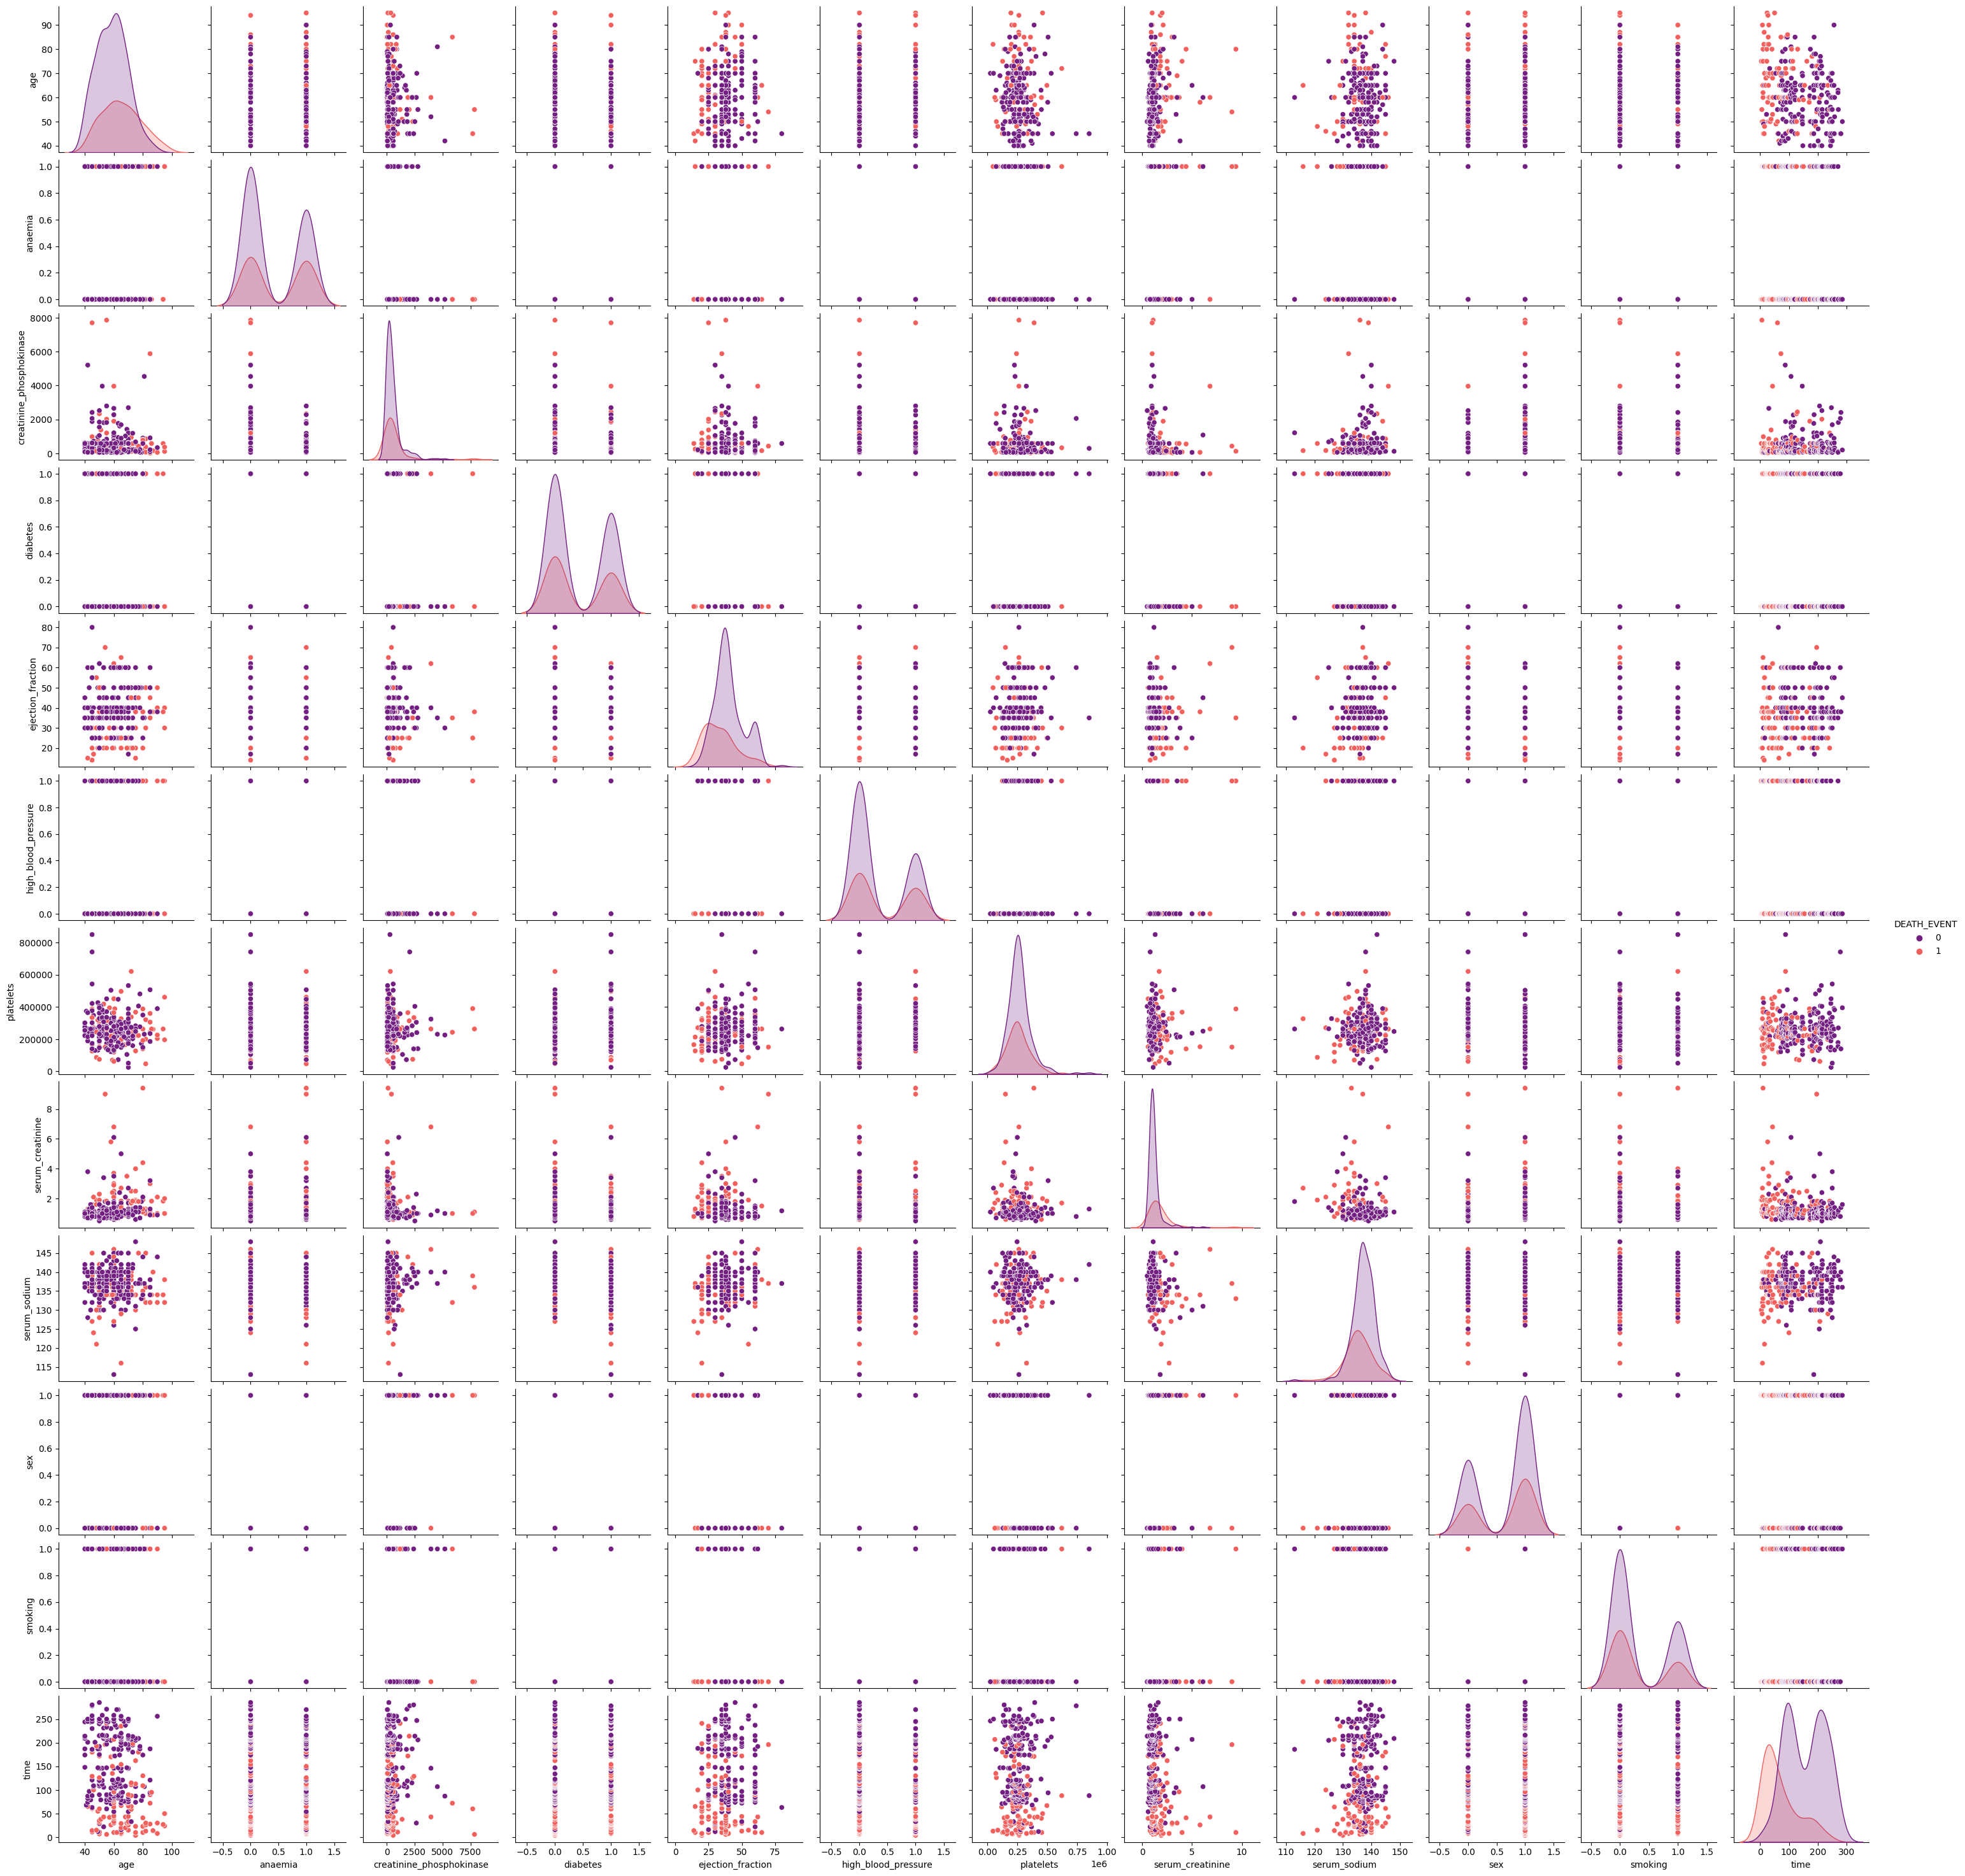

In [8]:
# Display pair plot for data visualization
sns.pairplot(df, hue='DEATH_EVENT', palette="magma")
plt.show()

# Logistic Regression


## Set up data for logistic regression analsis


In [9]:
# Split the data into features and target variable
X = df[['smoking', 'age','anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex']]
y = df['DEATH_EVENT']

## Check Associations

### Full Model

In [10]:
# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.492108
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.2160
Time:                        02:31:36   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.169e-13
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.9643      4.601      1.079      0.281      -4.054

### Reduced Model

Based on the summary of the full model, there will be two reduced models.\
r1 -> model based on coefficients\
r2 -> model based on p-values

In [11]:
# model r1 data
X1 = df[['sex', 'serum_creatinine', 'high_blood_pressure', 'anaemia']]
y1 = df['DEATH_EVENT']

#model r2 data
X2 = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine']]
y2 = df['DEATH_EVENT']

In [12]:
#Try new regression model with higher importance veriables based on coefficients

# Add a constant term for the intercept
X1 = sm.add_constant(X1)

# Create and fit logistic regression model
log_reg1 = sm.Logit(y1, X1).fit()

# Get summary report
summary = log_reg1.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.574183
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            4
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                 0.08522
Time:                        02:32:09   Log-Likelihood:                -171.68
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.925e-06
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.2514      0.408     -5.522      0.000      -3.050      -1.452
se

In [13]:
#Try new regression model with higher importance veriables based on p values

# Add a constant term for the intercept
X2 = sm.add_constant(X2)

# Create and fit logistic regression model
log_reg2 = sm.Logit(y2, X2).fit()

# Get summary report
summary = log_reg2.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.507020
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            4
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.1922
Time:                        02:32:20   Log-Likelihood:                -151.60
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 7.976e-15
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5753      0.861     -2.990      0.003      -4.263

## Check Prediction Accuracy

### Full model prediction

Confusion Matrix:
[[34  1]
 [23  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.97      0.74        35
           1       0.67      0.08      0.14        25

    accuracy                           0.60        60
   macro avg       0.63      0.53      0.44        60
weighted avg       0.63      0.60      0.49        60



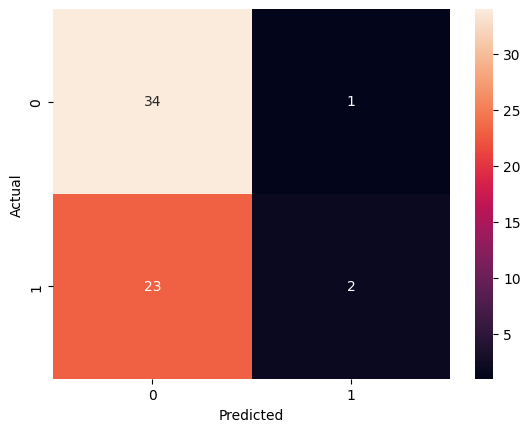

In [17]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the model
log_reg_f = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg_f.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = log_reg_f.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Reduced model prediction

Confusion Matrix:
[[33  2]
 [23  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.94      0.73        35
           1       0.50      0.08      0.14        25

    accuracy                           0.58        60
   macro avg       0.54      0.51      0.43        60
weighted avg       0.55      0.58      0.48        60



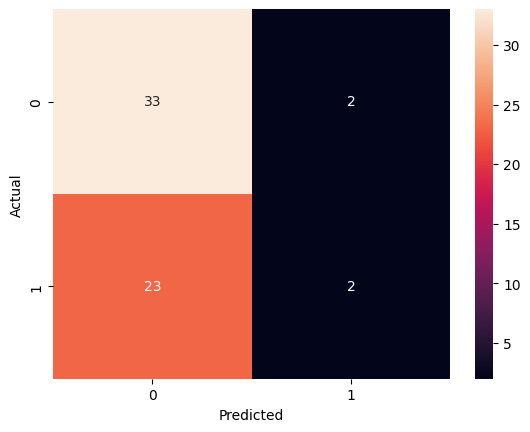

In [15]:
#Try new regression model with higher importance veriables based on coefficients

#Split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Fit the model
log_reg_r1 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg_r1.fit(X1_train, y1_train)

# Use the model to make predictions on the testing data
y1_pred = log_reg_r1.predict(X1_test)

# Evaluate the model
conf_matrix_1 = confusion_matrix(y1_test, y1_pred)
class_report_1 = classification_report(y1_test, y1_pred)

print("Confusion Matrix:")
print(conf_matrix_1)
print("\nClassification Report:")
print(class_report_1)

# Visualizing confusion matrix
sns.heatmap(conf_matrix_1, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Confusion Matrix:
[[30  5]
 [17  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.86      0.73        35
           1       0.62      0.32      0.42        25

    accuracy                           0.63        60
   macro avg       0.63      0.59      0.58        60
weighted avg       0.63      0.63      0.60        60



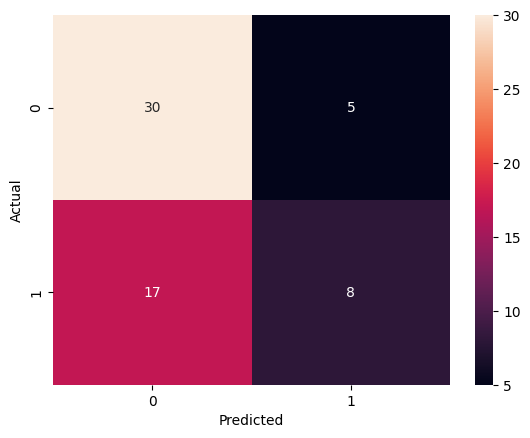

In [16]:
#Try new regression model with higher importance veriables based on p values

#Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Fit the model
log_reg_r2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg_r2.fit(X2_train, y2_train)

# Use the model to make predictions on the testing data
y2_pred = log_reg_r2.predict(X2_test)

# Evaluate the model
conf_matrix_2 = confusion_matrix(y2_test, y2_pred)
class_report_2 = classification_report(y2_test, y2_pred)

print("Confusion Matrix:")
print(conf_matrix_2)
print("\nClassification Report:")
print(class_report_2)

# Visualizing confusion matrix
sns.heatmap(conf_matrix_2, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()